In [159]:
import matplotlib.pyplot as plt
import json
import numpy as np
from collections import defaultdict

In [160]:
filepath = './'

In [161]:
with open(filepath + 'execution_data_baseline.json', 'r') as file:
    data = json.load(file)
    print(data)

{'60000': {'time': 1287.285123041831, 'accuracy': 0.9691}}


In [162]:
with open(filepath + 'execution_data_random.json', 'r') as file:
    data = json.load(file)

random_compiled_accuracy = []
random_compiled_time = []
for i in data:
    l1 = []
    l2 = []
    for d in data[i]:
        l1.append(d['accuracy'])
        l2.append(d['time'])
    random_compiled_accuracy.append(l1)
    random_compiled_time.append(l2)

random_compiled_accuracy = np.array(random_compiled_accuracy)
random_compiled_time = np.array(random_compiled_time)

In [163]:
sizes = [100, 500, 1000, 2000, 5000, 10000]
times_random = random_compiled_time.mean(axis=0)
accs_random = random_compiled_accuracy.mean(axis=0)

print("Results of sampling M random prototypes:")
for i in range(len(sizes)):
    print(f'Sample Size: {sizes[i]},  Avg Execution Time: {times_random[i]:.2f},  Avg Accuracy: {accs_random[i]:.4f}')

Results of sampling M random prototypes:
Sample Size: 100,  Avg Execution Time: 1.55,  Avg Accuracy: 0.7005
Sample Size: 500,  Avg Execution Time: 7.51,  Avg Accuracy: 0.8514
Sample Size: 1000,  Avg Execution Time: 15.37,  Avg Accuracy: 0.8860
Sample Size: 2000,  Avg Execution Time: 30.90,  Avg Accuracy: 0.9128
Sample Size: 5000,  Avg Execution Time: 81.28,  Avg Accuracy: 0.9345
Sample Size: 10000,  Avg Execution Time: 169.19,  Avg Accuracy: 0.9493


In [164]:
[acc*100 for acc in farthest_clustering_accuracies]

[51.300000000000004, 77.92999999999999, 83.67999999999999, 87.51, 91.79, 94.24]

In [165]:
with open(filepath + 'execution_data_vector_mean.json', 'r') as file:
    data = json.load(file)

sizes = [100, 500, 1000, 2000, 5000, 10000]
times_means = [d['time'] for d in data]
accs_means = [d['accuracy'] for d in data]

print("Results of sampling top M similar prototypes for respective group means:")
for i in range(len(sizes)):
    print(f'Sample Size: {sizes[i]},  Avg Execution Time: {times_means[i]:.2f},  Avg Accuracy: {accs_means[i]:.4f}')

Results of sampling top M similar prototypes for respective group means:
Sample Size: 100,  Avg Execution Time: 2.37,  Avg Accuracy: 0.6911
Sample Size: 500,  Avg Execution Time: 11.85,  Avg Accuracy: 0.7648
Sample Size: 1000,  Avg Execution Time: 23.22,  Avg Accuracy: 0.7849
Sample Size: 2000,  Avg Execution Time: 53.06,  Avg Accuracy: 0.8144
Sample Size: 5000,  Avg Execution Time: 138.83,  Avg Accuracy: 0.8467
Sample Size: 10000,  Avg Execution Time: 271.40,  Avg Accuracy: 0.8804


In [166]:
with open(filepath + 'execution_data_vector_median.json', 'r') as file:
    data = json.load(file)

sizes = [100, 500, 1000, 2000, 5000, 10000]
times_medians = [d['time'] for d in data]
accs_medians = [d['accuracy'] for d in data]

print("Results of sampling top M similar prototypes for respective group medians:")
for i in range(len(sizes)):
    print(f'Sample Size: {sizes[i]},  Avg Execution Time: {times_medians[i]:.2f},  Avg Accuracy: {accs_medians[i]:.4f}')

Results of sampling top M similar prototypes for respective group medians:
Sample Size: 100,  Avg Execution Time: 2.41,  Avg Accuracy: 0.7371
Sample Size: 500,  Avg Execution Time: 11.79,  Avg Accuracy: 0.7743
Sample Size: 1000,  Avg Execution Time: 23.36,  Avg Accuracy: 0.7866
Sample Size: 2000,  Avg Execution Time: 54.82,  Avg Accuracy: 0.8069
Sample Size: 5000,  Avg Execution Time: 136.19,  Avg Accuracy: 0.8260
Sample Size: 10000,  Avg Execution Time: 270.50,  Avg Accuracy: 0.8508


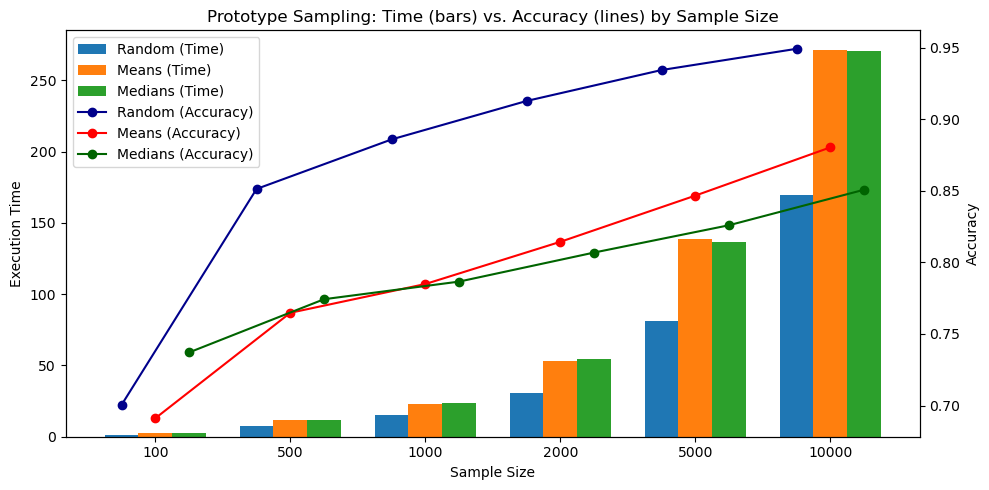

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Sample sizes (x-axis)
sample_sizes = np.array([100, 500, 1000, 2000, 5000, 10000])

# Set up figure
plt.figure(figsize=(10, 5))

# Create an array of x positions for grouped bars
x = np.arange(len(sample_sizes))
bar_width = 0.25

# --- Plot the bar charts (Time) on the primary y-axis ---
ax = plt.gca()  # Get current axes

bars_random  = ax.bar(x - bar_width, times_random, width=bar_width, label='Random (Time)')
bars_means   = ax.bar(x, times_means, width=bar_width, label='Means (Time)')
bars_medians = ax.bar(x + bar_width, times_medians, width=bar_width, label='Medians (Time)')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Execution Time')
ax.set_xticks(x)
ax.set_xticklabels(sample_sizes)

# --- Create a secondary y-axis for Accuracies ---
ax2 = ax.twinx()

# Plot lines (Accuracy) on the secondary y-axis
line_random,  = ax2.plot(x - bar_width, accs_random,  marker='o', color='darkblue',  label='Random (Accuracy)')
line_means,   = ax2.plot(x, accs_means, marker='o', color='red',label='Means (Accuracy)')
line_medians, = ax2.plot(x + bar_width, accs_medians, marker='o', color='darkgreen', label='Medians (Accuracy)')

ax2.set_ylabel('Accuracy')

# --- Combine legends from both axes ---
bars_legend, bars_labels = ax.get_legend_handles_labels()
lines_legend, lines_labels = ax2.get_legend_handles_labels()
ax2.legend(bars_legend + [line_random, line_means, line_medians],
           bars_labels + [line_random.get_label(), line_means.get_label(), line_medians.get_label()],
           loc='best')

plt.title('Prototype Sampling: Time (bars) vs. Accuracy (lines) by Sample Size')
plt.tight_layout()
plt.savefig('./time-and-accuracy-graph.png')
plt.show()




In [168]:
with open(filepath + 'execution_data_farthest_point_clustering.json', 'r') as file:
    data = json.load(file)
print("Results of sampling using classwise furthest-point clustering:")
for dim in data:
    print('Prototype chosen under reduced dimension:', dim)
    for i in range(len(data[dim])):
        print(f'\tSample Size: {data[dim][i]["sample_size"]}, Execution Time: {data[dim][i]["time"]:.2f}, Accuracy: {data[dim][i]["accuracy"]:.4f}')

Results of sampling using classwise furthest-point clustering:
Prototype chosen under reduced dimension: 3
	Sample Size: 100, Execution Time: 1.56, Accuracy: 0.5130
	Sample Size: 500, Execution Time: 7.16, Accuracy: 0.7793
	Sample Size: 1000, Execution Time: 14.23, Accuracy: 0.8368
	Sample Size: 2000, Execution Time: 28.42, Accuracy: 0.8751
	Sample Size: 5000, Execution Time: 70.87, Accuracy: 0.9179
	Sample Size: 10000, Execution Time: 141.11, Accuracy: 0.9424
Prototype chosen under reduced dimension: 4
	Sample Size: 100, Execution Time: 1.52, Accuracy: 0.4997
	Sample Size: 500, Execution Time: 7.17, Accuracy: 0.7417
	Sample Size: 1000, Execution Time: 14.17, Accuracy: 0.8125
	Sample Size: 2000, Execution Time: 28.12, Accuracy: 0.8696
	Sample Size: 5000, Execution Time: 70.35, Accuracy: 0.9121
	Sample Size: 10000, Execution Time: 141.00, Accuracy: 0.9388
Prototype chosen under reduced dimension: 8
	Sample Size: 100, Execution Time: 1.52, Accuracy: 0.4640
	Sample Size: 500, Execution Ti

In [169]:
sample_100 = [data[dim][0]['accuracy'] for dim in data]
sample_1000 = [data[dim][2]['accuracy'] for dim in data]
sample_10000 = [data[dim][5]['accuracy'] for dim in data]
dims = [dim for dim in data]

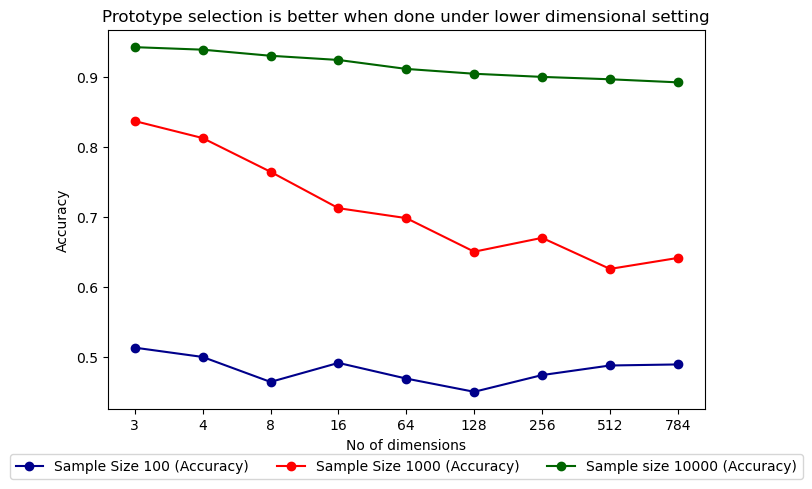

In [170]:
# Set up figure
plt.figure(figsize=(8, 5))

# Create an array of x positions for grouped bars
x = np.arange(len(dims))

ax = plt.gca()  # Get current axes

ax.set_xlabel('No of dimensions')
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(dims)


# Plot lines (Accuracy) on the secondary y-axis
line_100,  = ax.plot(x, sample_100,  marker='o', color='darkblue',  label='Sample Size 100 (Accuracy)')
line_1000,   = ax.plot(x, sample_1000, marker='o', color='red', label='Sample Size 1000 (Accuracy)')
line_10000, = ax.plot(x, sample_10000, marker='o', color='darkgreen', label='Sample size 10000 (Accuracy)')

# --- Combine legends from both axes ---
lines_legend, lines_labels = ax.get_legend_handles_labels()
ax.legend([line_100, line_1000, line_10000],
           [line_100.get_label(), line_1000.get_label(), line_10000.get_label()],
           loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, ncol=3)

plt.title('Prototype selection is better when done under lower dimensional setting')
plt.tight_layout()
plt.savefig('./dimensionality-impacts-accuracy.png')
plt.show()

In [171]:
farthest_clustering_times = [data['3'][i]['time'] for i in range(6)]
farthest_clustering_accuracies = [data['3'][i]['accuracy'] for i in range(6)]

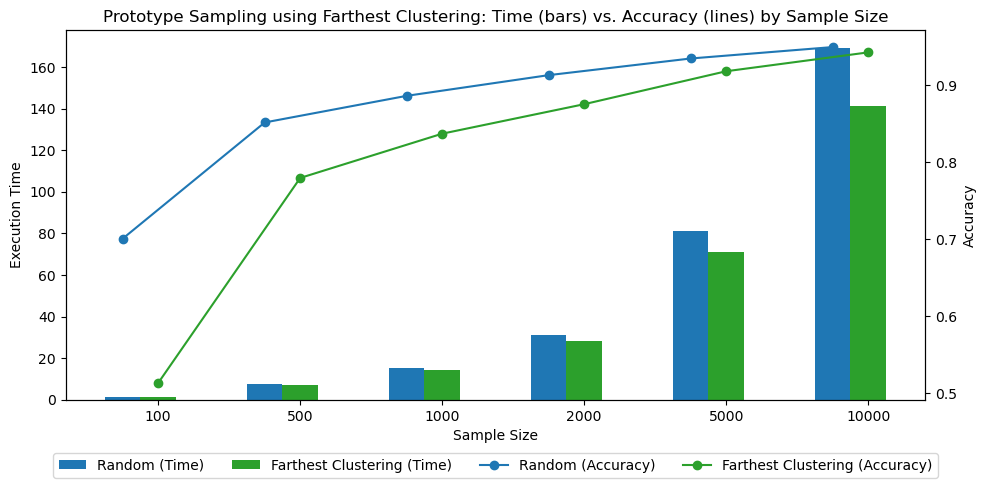

In [172]:
# Sample sizes (x-axis)
sample_sizes = np.array([100, 500, 1000, 2000, 5000, 10000])

# Set up figure
plt.figure(figsize=(10, 5))

# Create an array of x positions for grouped bars
x = np.arange(len(sample_sizes))
bar_width = 0.25

# --- Plot the bar charts (Time) on the primary y-axis ---
ax = plt.gca()  # Get current axes

bars_random  = ax.bar(x - bar_width, times_random, width=bar_width, color='tab:blue', label='Random (Time)')
bars_fc   = ax.bar(x, farthest_clustering_times, width=bar_width, color='tab:green', label='Farthest Clustering (Time)')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Execution Time')
ax.set_xticks(x)
ax.set_xticklabels(sample_sizes)

# --- Create a secondary y-axis for Accuracies ---
ax2 = ax.twinx()

# Plot lines (Accuracy) on the secondary y-axis
line_random,  = ax2.plot(x - bar_width, accs_random,  marker='o', color='tab:blue',  label='Random (Accuracy)')
line_fc,   = ax2.plot(x, farthest_clustering_accuracies, marker='o', color='tab:green',label='Farthest Clustering (Accuracy)')

ax2.set_ylabel('Accuracy')

# --- Combine legends from both axes ---
bars_legend, bars_labels = ax.get_legend_handles_labels()
lines_legend, lines_labels = ax2.get_legend_handles_labels()
ax2.legend(bars_legend + [line_random, line_fc],
           bars_labels + [line_random.get_label(), line_fc.get_label()],
           loc='upper center', bbox_to_anchor=(0.5, -0.125),
          fancybox=True, ncol=4)

plt.title('Prototype Sampling using Farthest Clustering: Time (bars) vs. Accuracy (lines) by Sample Size')
plt.tight_layout()
plt.savefig('./farthest-clustering.png')
plt.show()




In [184]:
with open(filepath + 'execution_data_facility_location.json', 'r') as file:
    data = json.load(file)

ofs_accuracies = np.array([data['256'][i]['accuracy'] for i in range(6)])
ofs_times = np.array([data['256'][i]['time'] for i in range(6)])

print("Results of sampling using classwise Optimal Facility Location:")
for dim in data:
    print('Prototype chosen under reduced dimension:', dim)
    for i in range(len(data[dim])):
        print(f'\tSample Size: {data[dim][i]["sample_size"]}, Execution Time: {data[dim][i]["time"]:.2f}, Accuracy: {data[dim][i]["accuracy"]:.4f}')

Results of sampling using classwise Optimal Facility Location:
Prototype chosen under reduced dimension: 3
	Sample Size: 100, Execution Time: 1.83, Accuracy: 0.7574
	Sample Size: 500, Execution Time: 8.50, Accuracy: 0.8588
	Sample Size: 1000, Execution Time: 14.35, Accuracy: 0.8871
	Sample Size: 2000, Execution Time: 28.16, Accuracy: 0.9140
	Sample Size: 5000, Execution Time: 85.98, Accuracy: 0.9397
	Sample Size: 10000, Execution Time: 141.75, Accuracy: 0.9496
Prototype chosen under reduced dimension: 4
	Sample Size: 100, Execution Time: 1.46, Accuracy: 0.7707
	Sample Size: 500, Execution Time: 7.10, Accuracy: 0.8691
	Sample Size: 1000, Execution Time: 14.32, Accuracy: 0.8899
	Sample Size: 2000, Execution Time: 28.41, Accuracy: 0.9150
	Sample Size: 5000, Execution Time: 70.83, Accuracy: 0.9389
	Sample Size: 10000, Execution Time: 142.52, Accuracy: 0.9481
Prototype chosen under reduced dimension: 8
	Sample Size: 100, Execution Time: 1.46, Accuracy: 0.8128
	Sample Size: 500, Execution Ti

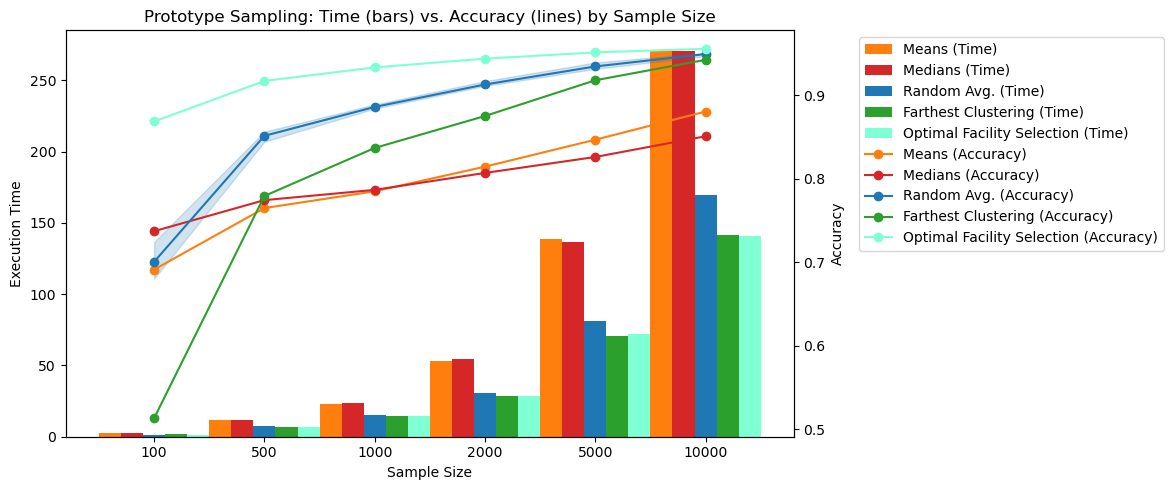

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Sample sizes (x-axis)
sample_sizes = np.array([100, 500, 1000, 2000, 5000, 10000])

# Compute mean, min, and max for the random accuracies
accs_random_mean = random_compiled_accuracy.mean(axis=0)
accs_random_min = random_compiled_accuracy.min(axis=0)
accs_random_max = random_compiled_accuracy.max(axis=0)

# Set up figure
plt.figure(figsize=(12, 5))

# Create an array of x positions for grouped bars
x = np.arange(len(sample_sizes))
bar_width = 0.2

# --- Plot the bar charts (Time) on the primary y-axis ---
ax = plt.gca()  # Get current axes

bars_means = ax.bar(x - bar_width*2, times_means, color='tab:orange', width=bar_width, label='Means (Time)')
bars_medians = ax.bar(x - bar_width, times_medians, color='tab:red', width=bar_width, label='Medians (Time)')
bars_random = ax.bar(x, times_random, width=bar_width, color='tab:blue', label='Random Avg. (Time)')
bars_fc = ax.bar(x + bar_width, farthest_clustering_times, width=bar_width, color='tab:green', label='Farthest Clustering (Time)')
bars_ofs = ax.bar(x + bar_width*2, ofs_times, width=bar_width, color='aquamarine', label='Optimal Facility Selection (Time)')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Execution Time')
ax.set_xticks(x)
ax.set_xticklabels(sample_sizes)

# --- Create a secondary y-axis for Accuracies ---
ax2 = ax.twinx()

# Plot lines (Accuracy) on the secondary y-axis
line_means, = ax2.plot(x, accs_means, marker='o', color='tab:orange', label='Means (Accuracy)')
line_medians, = ax2.plot(x, accs_medians, marker='o', color='tab:red', label='Medians (Accuracy)')
line_random, = ax2.plot(x, accs_random_mean, marker='o', color='tab:blue', label='Random Avg. (Accuracy)')
line_fc, = ax2.plot(x, farthest_clustering_accuracies, marker='o', color='tab:green', label='Farthest Clustering (Accuracy)')
line_ofs, = ax2.plot(x, ofs_accuracies, marker='o', color='aquamarine', label='Optimal Facility Selection (Accuracy)')

# --- Add a shaded range for random sampling accuracies ---
ax2.fill_between(x, accs_random_min, accs_random_max, color='tab:blue', alpha=0.2, label='Random Accuracy Range')

ax2.set_ylabel('Accuracy')

# --- Combine legends from both axes ---
bars_legend, bars_labels = ax.get_legend_handles_labels()
lines_legend, lines_labels = ax2.get_legend_handles_labels()
ax2.legend(
    bars_legend + [line_means, line_medians, line_random, line_fc, line_ofs],
    bars_labels + [line_means.get_label(), line_medians.get_label(), line_random.get_label(), line_fc.get_label(), line_ofs.get_label()],
    loc='upper left', bbox_to_anchor=(1.08, 1), ncol=1
)

plt.title('Prototype Sampling: Time (bars) vs. Accuracy (lines) by Sample Size')
plt.tight_layout()
plt.savefig('./time-accuracy-graph-all.png')
plt.show()
